In [1]:
# Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import datetime
import scipy.stats as stats
style.use('fivethirtyeight')

In [2]:
# Checking the encoding of the data
with open("../../Data/PlaylistData/2016.csv") as f:
    print(f)

<_io.TextIOWrapper name='../../Data/PlaylistData/2016.csv' mode='r' encoding='cp1252'>


In [3]:
# Importing the data
df2016 = pd.read_csv("../../Data/PlaylistData/2016.csv", encoding = "cp1252")
df2017 = pd.read_csv("../../Data/PlaylistData/2017.csv", encoding = "cp1252")
df2018 = pd.read_csv("../../Data/PlaylistData/2018.csv", encoding = "cp1252")
df2019 = pd.read_csv("../../Data/PlaylistData/2019.csv", encoding = "cp1252")
playlists = [df2016, df2017, df2018, df2019]
playlistName = ["2016", "2017", "2018", "2019"]

In [4]:
# Changing "Length" to a float in each dataset
i = 0
for playlist in playlists:
#     print(playlistName[i])
    playlist["Length"] = playlist.apply(lambda row: datetime.strptime(row["Length"], '%M:%S'), axis = 1)
    playlist["Length"] = (playlist["Length"].dt.minute * 60 + playlist["Length"].dt.second)
    i += 1

In [5]:
# Merging into one Dataset
df = pd.DataFrame(columns = df2016.columns)

i = 0
for playlist in playlists:
    playlist["Playlist"] = playlistName[i]
    df = df.append(playlist)
    i += 1

# Changes relevant attributes to floats
attributes = ["BPM", "Energy", "Dance", "Loud", "Valence", "Length", "Acoustic", "Popularity"]
for atr in attributes:
    df[atr] = df[atr].astype(float)
    
df.head()

,Song,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Popularity,Rnd,Playlist
0,Man On The Moon,Kid Cudi,1/1/2009,91.0,66.0,65.0,-9.0,50.0,211.0,64.0,59.0,9697,2016
1,Just What I Am,Kid Cudi,1/1/2013,140.0,95.0,65.0,-3.0,35.0,228.0,0.0,45.0,8785,2016
2,Angels (feat. Saba),Chance the Rapper,5/27/2016,156.0,65.0,77.0,-5.0,68.0,206.0,29.0,63.0,4368,2016
3,Pursuit Of Happiness (Nightmare),Kid Cudi,1/1/2009,115.0,61.0,63.0,-9.0,27.0,295.0,48.0,53.0,4735,2016
4,Broccoli,DRAM,4/6/2016,146.0,53.0,89.0,-7.0,71.0,225.0,24.0,69.0,9913,2016


In [6]:
df.sort_values(by = "Valence", ascending = False)[0:15]

,Song,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Popularity,Rnd,Playlist
29,Medicated (feat. Chevy Woods & Juicy J),Wiz Khalifa,12/4/2012,136.0,89.0,75.0,-4.0,96.0,331.0,1.0,63.0,8742,2016
81,Jump (feat. Gizzle),Lupe Fiasco,1/13/2017,76.0,76.0,79.0,-6.0,96.0,275.0,4.0,0.0,5136,2017
96,Wedding Crashers,Aminé,7/28/2017,136.0,50.0,85.0,-8.0,93.0,230.0,3.0,57.0,5569,2019
100,One Love / People Get Ready,Bob Marley & The Wailers,1/1/1977,77.0,52.0,72.0,-10.0,93.0,173.0,9.0,20.0,9018,2016
3,Wedding Crashers,Aminé,7/28/2017,136.0,50.0,85.0,-8.0,93.0,230.0,3.0,57.0,2995,2018
17,Flashed Junk Mind,Milky Chance,6/20/2014,118.0,84.0,84.0,-9.0,90.0,262.0,39.0,63.0,7699,2017
17,Autopilot,Quinn XCII,2/15/2019,95.0,62.0,81.0,-7.0,90.0,182.0,19.0,58.0,1453,2019
21,Start a Riot,Duckwrth,12/14/2018,143.0,73.0,73.0,-4.0,89.0,171.0,1.0,68.0,4796,2019
42,Hustler,Zayde Wølf,11/4/2016,82.0,86.0,57.0,-4.0,89.0,195.0,4.0,60.0,505,2018
84,BLACKJACK (feat. YBN Cordae) - Remix,Aminé,2/8/2019,131.0,58.0,96.0,-6.0,89.0,163.0,16.0,58.0,1492,2019


# BPM

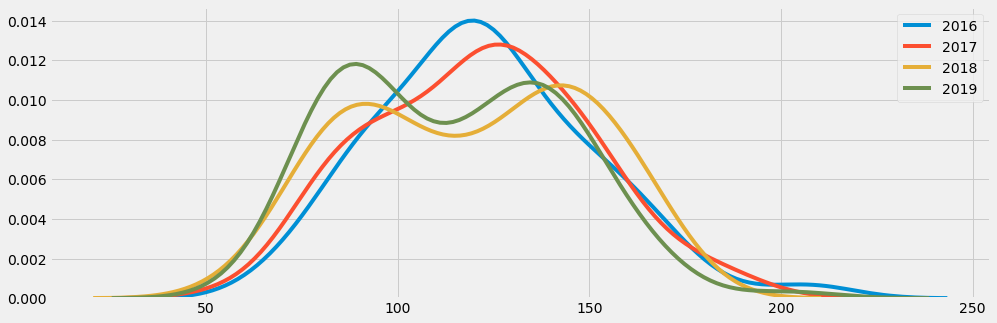

In [7]:
plt.figure(figsize = (15,5))

i = 0
for playlist in playlists:
    sns.kdeplot(playlist["BPM"], label = playlistName[i])
    i += 1

plt.legend(loc = "upper right")

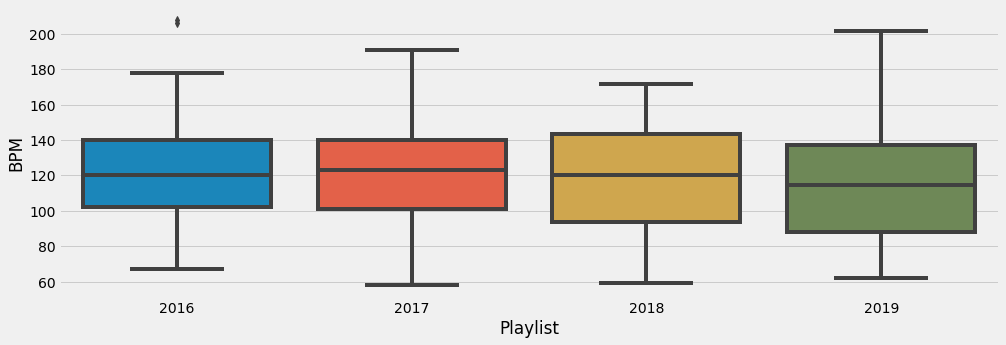

In [8]:
plt.figure(figsize = (15,5))

sns.boxplot(x = "Playlist", y = "BPM", data = df)

# Energy

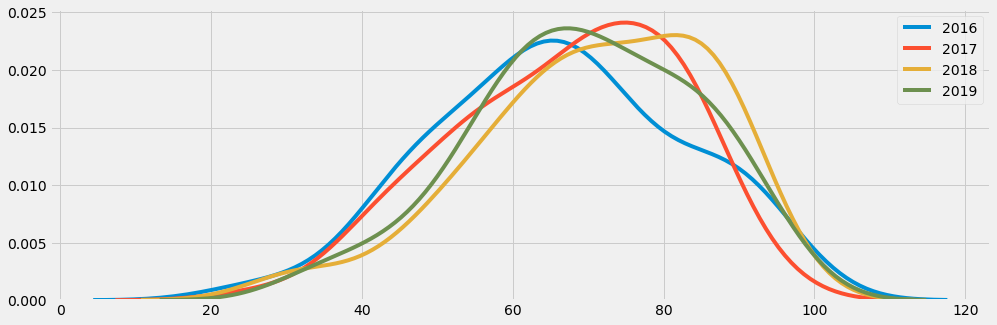

In [9]:
plt.figure(figsize = (15,5))

i = 0
for playlist in playlists:
    sns.kdeplot(playlist["Energy"], label = playlistName[i])
    i += 1

plt.legend(loc = "upper right")

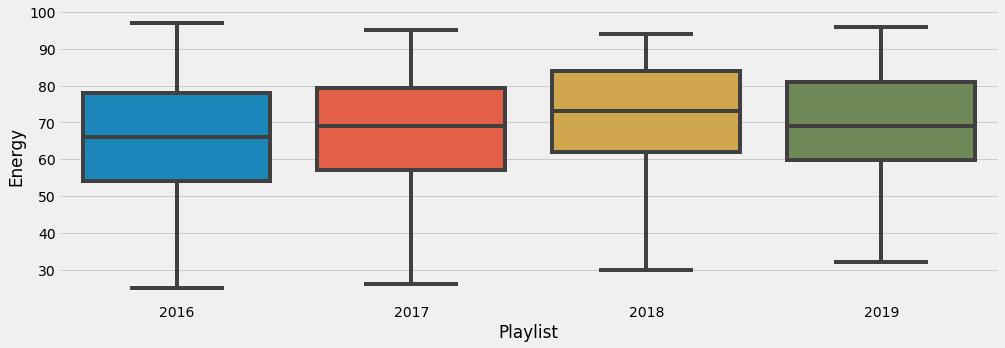

In [10]:
plt.figure(figsize = (15,5))

sns.boxplot(x = "Playlist", y = "Energy", data = df)

# Dance

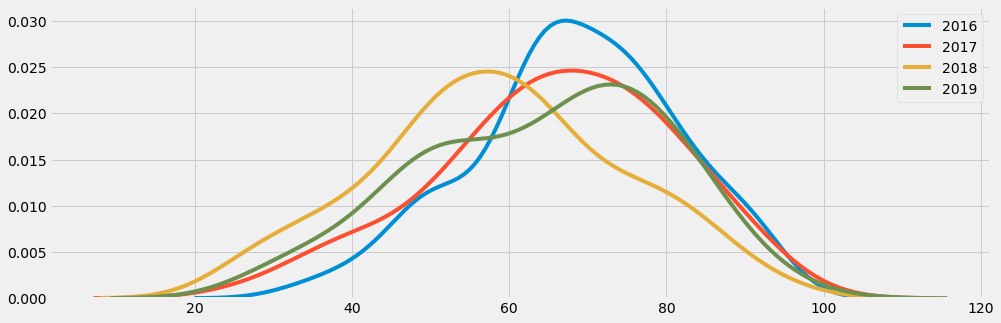

In [11]:
plt.figure(figsize = (15,5))

i = 0
for playlist in playlists:
    sns.kdeplot(playlist["Dance"], label = playlistName[i])
    i += 1

plt.legend(loc = "upper right")

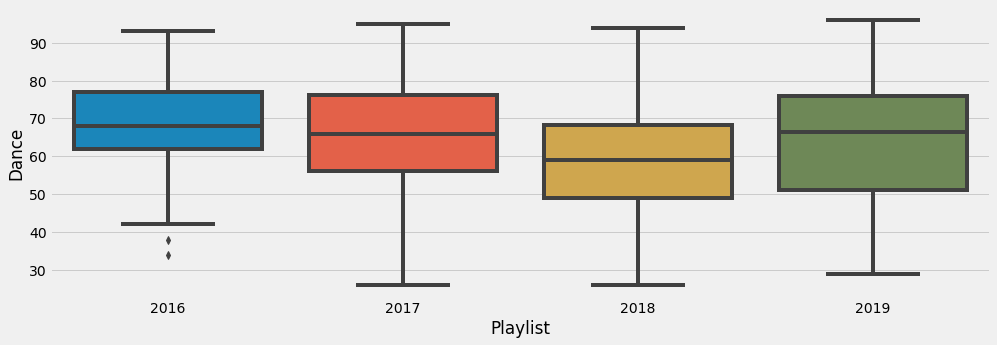

In [12]:
plt.figure(figsize = (15,5))

sns.boxplot(x = "Playlist", y = "Dance", data = df)

# Loud

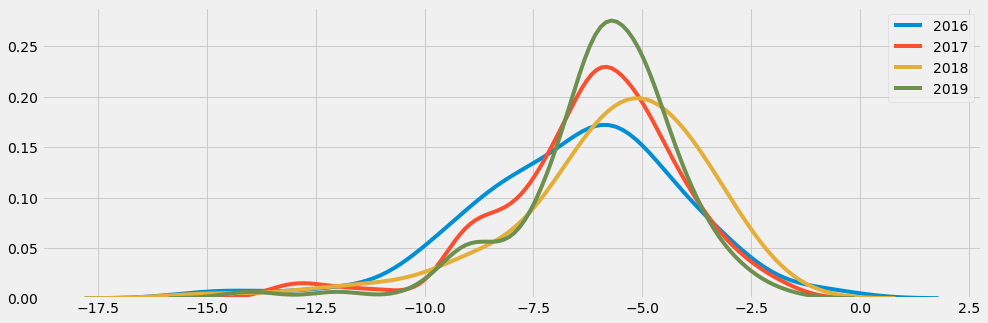

In [13]:
plt.figure(figsize = (15,5))

i = 0
for playlist in playlists:
    sns.kdeplot(playlist["Loud"], label = playlistName[i])
    i += 1

plt.legend(loc = "upper right")

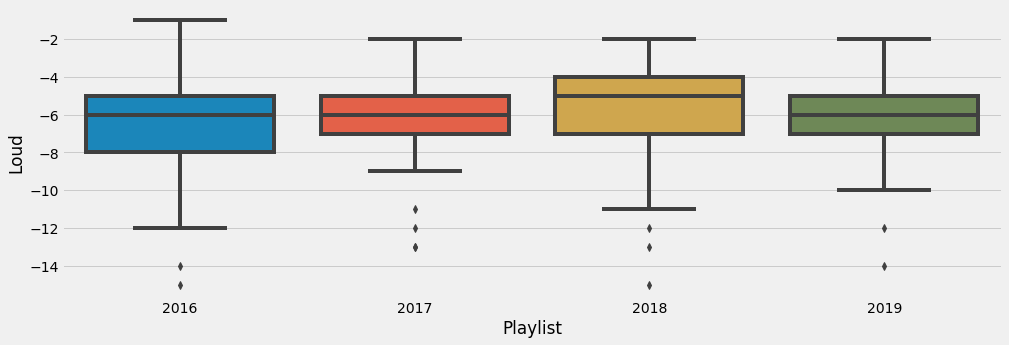

In [14]:
plt.figure(figsize = (15,5))

sns.boxplot(x = "Playlist", y = "Loud", data = df)

# Valence

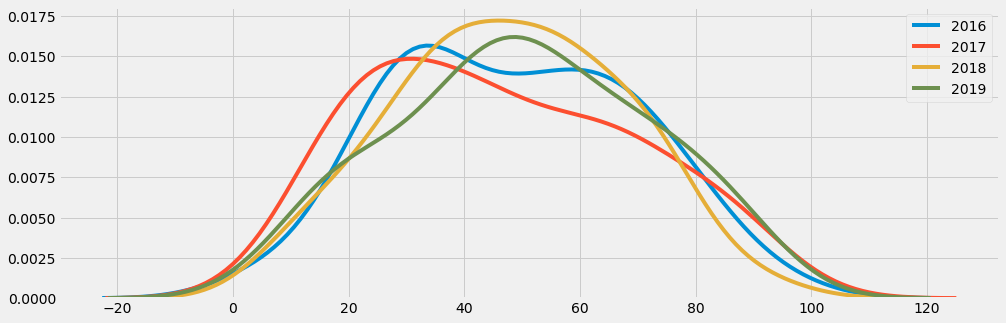

In [15]:
plt.figure(figsize = (15,5))

i = 0
for playlist in playlists:
    sns.kdeplot(playlist["Valence"], label = playlistName[i])
    i += 1

plt.legend(loc = "upper right")

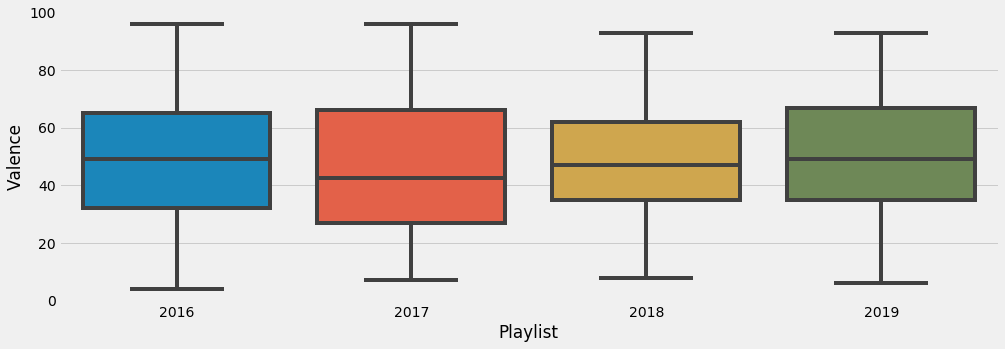

In [16]:
plt.figure(figsize = (15,5))

sns.boxplot(x = "Playlist", y = "Valence", data = df)

# Length

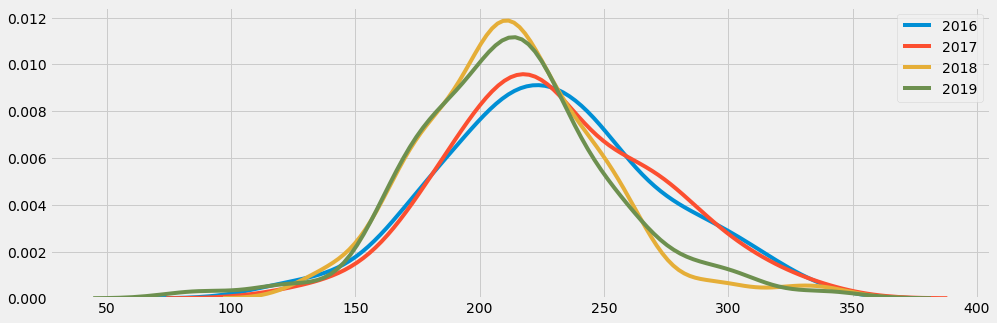

In [17]:
plt.figure(figsize = (15,5))

i = 0
for playlist in playlists:
    sns.kdeplot(playlist["Length"], label = playlistName[i])
    i += 1

plt.legend(loc = "upper right")

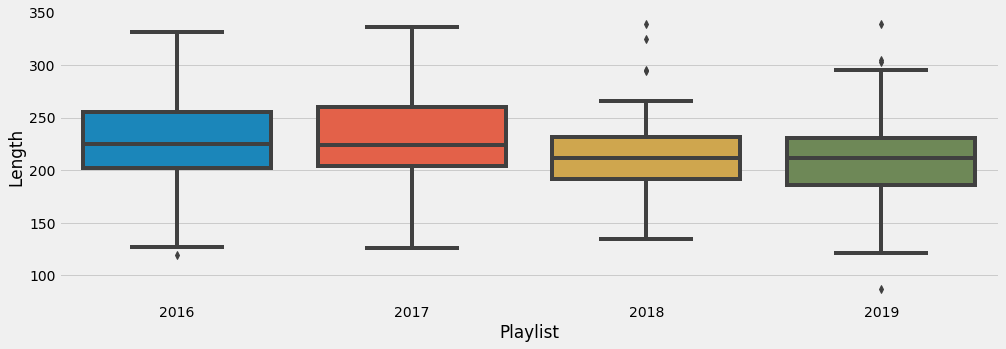

In [23]:
plt.figure(figsize = (15,5))

sns.boxplot(x = "Playlist", y = "Length", data = df)

# Acoustic

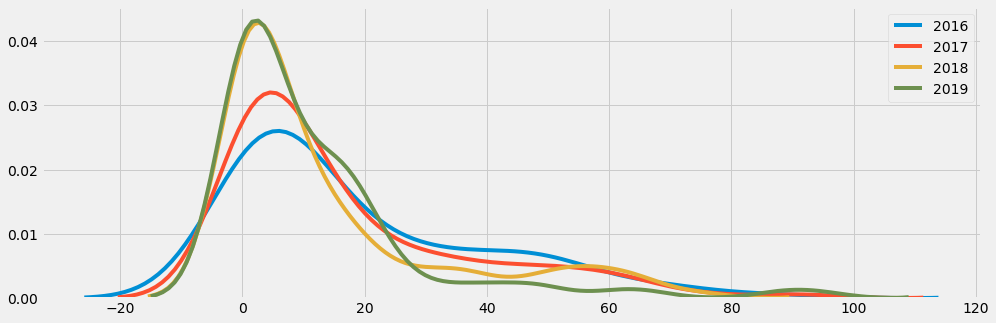

In [19]:
plt.figure(figsize = (15,5))

i = 0
for playlist in playlists:
    sns.kdeplot(playlist["Acoustic"], label = playlistName[i])
    i += 1

plt.legend(loc = "upper right")

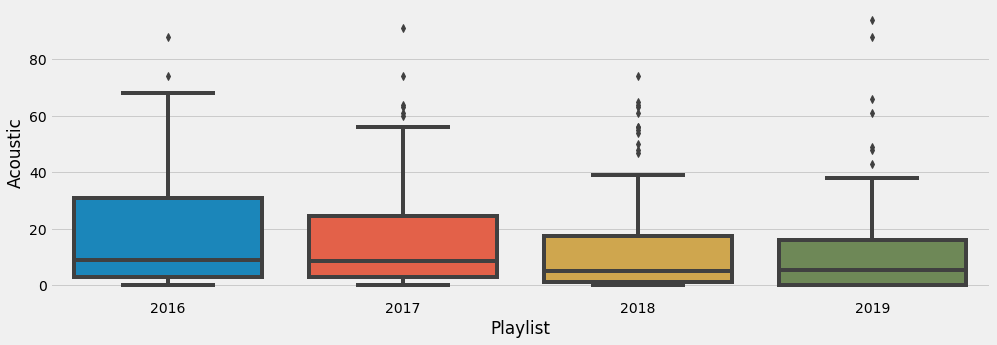

In [20]:
plt.figure(figsize = (15,5))

sns.boxplot(x = "Playlist", y = "Acoustic", data = df)

# Popularity

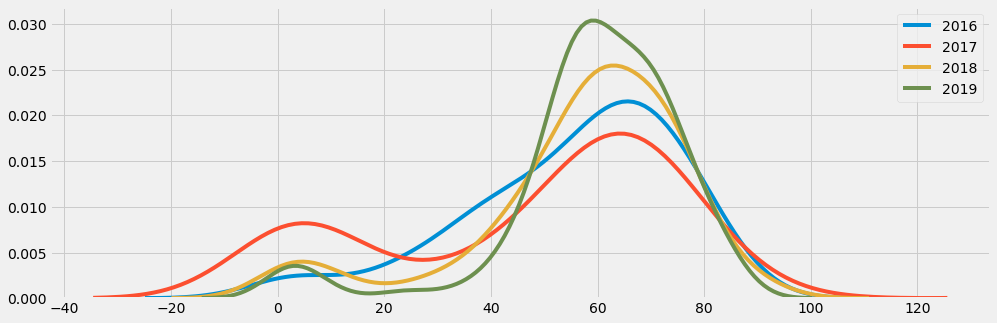

In [21]:
plt.figure(figsize = (15,5))

i = 0
for playlist in playlists:
    sns.kdeplot(playlist["Popularity"], label = playlistName[i])
    i += 1

plt.legend(loc = "upper right")

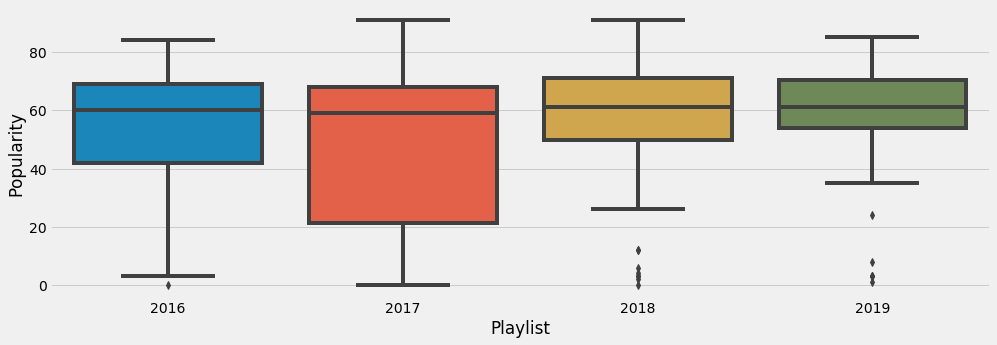

In [22]:
plt.figure(figsize = (15,5))

sns.boxplot(x = "Playlist", y = "Popularity", data = df)